In [ ]:
import os

# Load dataset dari Google Drive

# os.chdir('/drive/My Drive/Datasets')

os.listdir('.')

['iris.csv']

In [ ]:
file_exists = os.path.isfile('iris.csv')

file_exists

True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
filename = 'iris.csv'

dataset = pd.read_csv(filename)

dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
print(dataset['Species'].value_counts())

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


In [ ]:
dataset.columns # List features

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

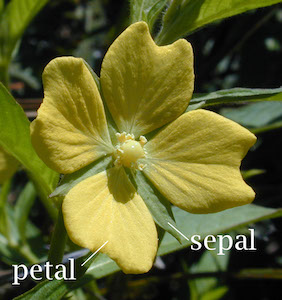

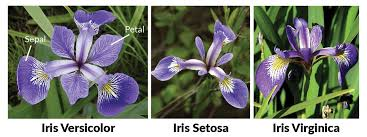

**Exploratory Data Analysis**

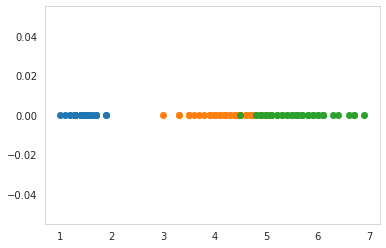

In [ ]:
iris_setosa = dataset.loc[dataset["Species"] == "Iris-setosa"]
iris_virginica = dataset.loc[dataset["Species"] == "Iris-virginica"]
iris_versicolor = dataset.loc[dataset["Species"] == "Iris-versicolor"]
plt.plot(iris_setosa["PetalLengthCm"],np.zeros_like(iris_setosa["PetalLengthCm"]), 'o')
plt.plot(iris_versicolor["PetalLengthCm"],np.zeros_like(iris_versicolor["PetalLengthCm"]), 'o')
plt.plot(iris_virginica["PetalLengthCm"],np.zeros_like(iris_virginica["PetalLengthCm"]), 'o')
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


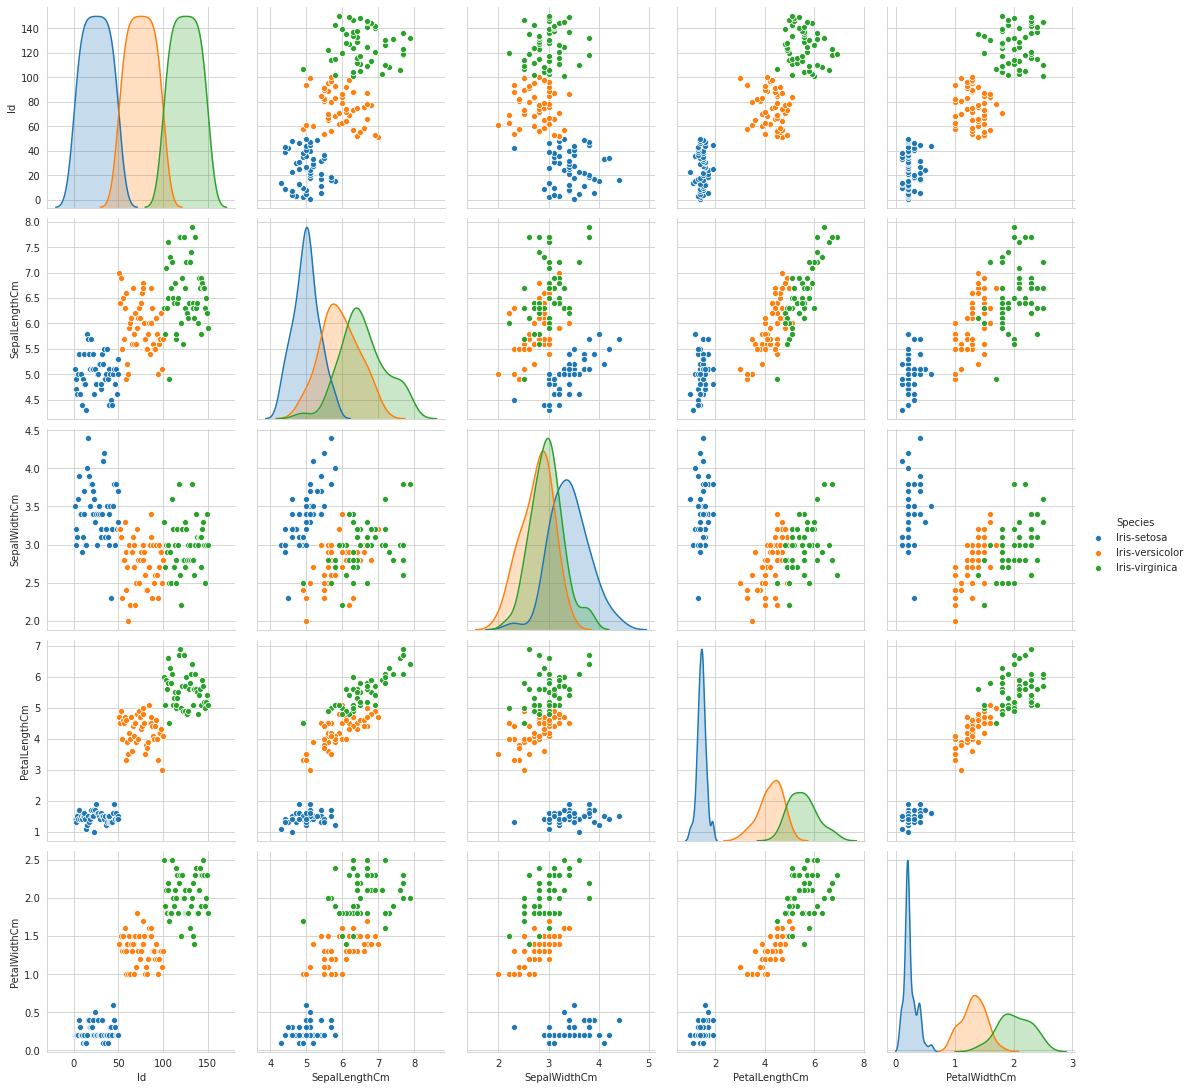

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(dataset, hue="Species", size=3);
plt.show()

In [ ]:
Y = dataset['Species'] # Target prediksi
x = dataset.drop(['Id', 'Species'], axis=1) # Data Id tidak diperlukan

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns=x.columns)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.15)

**Logistic Regression**

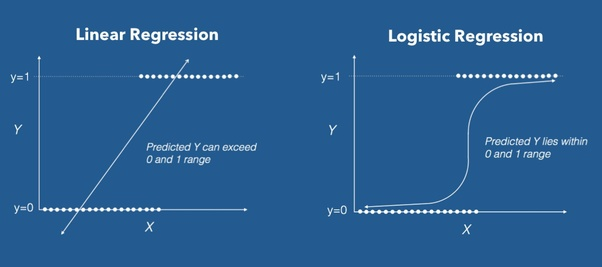

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test))) # .score() -> Accuracy
print(f1_score(y_test, y_pred, average='macro'))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))

Accuracy of logistic regression classifier on test set: 0.91
0.919047619047619
0.919047619047619
0.919047619047619


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.86      0.86      0.86         7

       accuracy                           0.91        23
      macro avg       0.92      0.92      0.92        23
   weighted avg       0.91      0.91      0.91        23



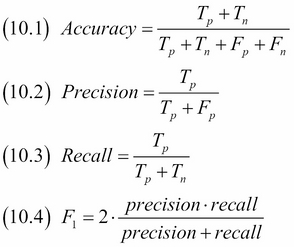

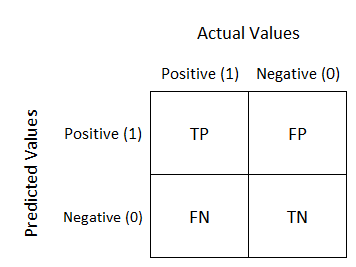

**SVM**

In [ ]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = "rbf")
classifier_rbf.fit(x_train, y_train)
y_pred = classifier_rbf.predict(x_test)
print('Accuracy of SVC (RBF) classifier on test set: {:.2f}'.format(classifier_rbf.score(x_test, y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

Accuracy of SVC (RBF) classifier on test set: 0.96
0.9584859584859585
0.9696969696969697
0.9523809523809524


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.96        23
      macro avg       0.97      0.95      0.96        23
   weighted avg       0.96      0.96      0.96        23



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=300, bootstrap=True, max_features = "sqrt")
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(rf_model.score(x_test, y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

Accuracy of Random Forest on test set: 0.91
0.919047619047619
0.919047619047619
0.919047619047619


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.86      0.86      0.86         7

       accuracy                           0.91        23
      macro avg       0.92      0.92      0.92        23
   weighted avg       0.91      0.91      0.91        23



**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
print("KNN Test Score", knn.score(x_test, y_test))

Max train score 100.0 % and k = [1]
Max test score 95.65217391304348 % and k = [3, 4, 5, 11, 12, 13, 14]


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(x_test)
confusion_matrix(y_test,y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)) # Confusion matrix

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica  All
True                                                              
Iris-setosa                6                0               0    6
Iris-versicolor            0               10               0   10
Iris-virginica             0                2               5    7
All                        6               12               5   23


In [ ]:
from sklearn.metrics import classification_report
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.71      0.83         7

       accuracy                           0.91        23
      macro avg       0.94      0.90      0.91        23
   weighted avg       0.93      0.91      0.91        23



# Assignment

1. Untuk algoritma Random Forest, gunakan nilai estimator:
  * 50
  * 100
  * 200

  Bandingkanlah hasilnya dan apabila hasil accuracy dari masing-masing hyperparameter berubah, coba simpulkan alasannya!

2. Untuk algoritma SVM, gunakan kernel:
  * Polynomial
  * Linear

  Dan gunakan juga LinearSVC menggunakan linear kernel.

  Hint: https://scikit-learn.org/stable/modules/svm.html

  Bandingkanlah hasilnya dan apabila hasil accuracy dari masing-masing hyperparameter berubah, coba simpulkan alasannya!

3. Untuk algoritma k-NN, carilah nilai *k* yang terbaik dari nilai 1, 3, 5, 7, 9, 11, 13, dan 15.
